<h1>Variational Inference</h1>

In [85]:
import numpy as np

mu = np.random.rand(10,10)
print(mu)

[[0.11437229 0.02468316 0.82263938 0.5977445  0.36107612 0.82591616
  0.2435393  0.10740426 0.238496   0.08691554]
 [0.43464546 0.60682188 0.42178345 0.93658232 0.97885932 0.64735795
  0.10281194 0.70387249 0.04771819 0.1327169 ]
 [0.2261676  0.3227015  0.49958056 0.88123282 0.52281818 0.04092562
  0.93756929 0.35954441 0.78621493 0.10169307]
 [0.9405568  0.46552035 0.72047137 0.61160552 0.30738833 0.36243068
  0.50806819 0.57890285 0.60288423 0.67952402]
 [0.56063824 0.89524423 0.37235198 0.16020905 0.98684838 0.15455836
  0.04651203 0.7228716  0.63709545 0.72484662]
 [0.24925815 0.27769417 0.51450755 0.13112004 0.29683545 0.6757403
  0.43492952 0.20623433 0.01014448 0.04164159]
 [0.64260243 0.65638688 0.62300155 0.06389374 0.1080128  0.17854326
  0.94769854 0.48505279 0.64320365 0.75283296]
 [0.71809497 0.22385224 0.76141187 0.18382242 0.87569527 0.07667234
  0.0139419  0.00371682 0.68810589 0.49667396]
 [0.04242655 0.18035468 0.99365301 0.65489999 0.01349133 0.00180142
  0.25709006 

[[0.01222879 0.01337676 0.01353368 0.01355303 0.01355534 0.01355534
  0.01355303 0.01353368 0.01337676 0.01222879]
 [0.01337665 0.01408202 0.0141255  0.01412844 0.01412868 0.01412868
  0.01412844 0.0141255  0.01408202 0.01337665]
 [0.01353287 0.01412543 0.01415462 0.01415602 0.01415609 0.01415609
  0.01415602 0.01415462 0.01412543 0.01353287]
 [0.01354643 0.01412767 0.01415576 0.01415706 0.01415712 0.01415712
  0.01415706 0.01415576 0.01412767 0.01354643]
 [0.01350127 0.01411876 0.01415065 0.01415229 0.01415237 0.01415237
  0.01415229 0.01415065 0.01411876 0.01350127]
 [0.01312528 0.01397349 0.01404184 0.01404743 0.01404759 0.01404759
  0.01404743 0.01404184 0.01397349 0.01312528]
 [0.01072855 0.01185708 0.01209007 0.01211907 0.01211629 0.01211629
  0.01211907 0.01209007 0.01185708 0.01072855]
 [0.00434375 0.0030906  0.00268236 0.00255274 0.00251336 0.00251336
  0.00255274 0.00268236 0.0030906  0.00434375]
 [0.0017603  0.00062269 0.00049284 0.00047411 0.00047021 0.00047021
  0.00047411

<Axes: >

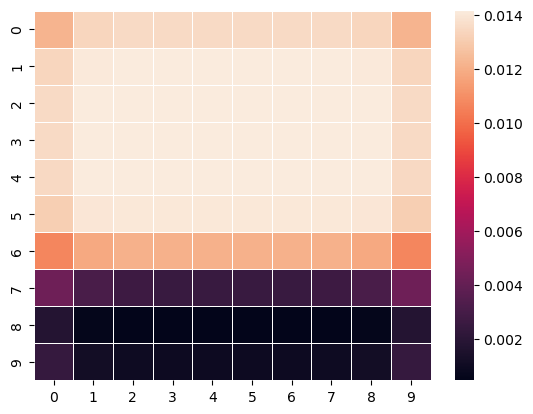

In [134]:
from math import exp

num_iter = 1000
BETA = 1

mu = np.random.rand(10,10)

for _ in range(num_iter):
    mu_copy = mu
    for i in range(10):
        for j in range(10):
            s = 0
            s = s if j == 0 else s + (2 * mu_copy[i][j-1] - 1)
            s = s if j == 9 else s + (2 * mu_copy[i][j+1] - 1)
            s = s if i == 0 else s + (2 * mu_copy[i-1][j] - 1)
            s = s if i == 9 else s + (2 * mu_copy[i+1][j] - 1)
            # print(f"i:{i}, j:{j}, s: {s}")

            s *= BETA
            s *= -1

            mu[i][j] = 1 / (1 + exp(s))

mu /= np.sum(mu)
print(mu)
sns.heatmap(mu, linewidths=0.5)

<h2>Early termination</h2>

          0         1         2         3         4         5         6  \
0  0.037026  0.018017  0.015418  0.015098  0.015060  0.015060  0.015098   
1  0.018017  0.006338  0.005618  0.005569  0.005565  0.005565  0.005569   
2  0.015418  0.005618  0.005136  0.005112  0.005111  0.005111  0.005112   
3  0.015098  0.005569  0.005112  0.005092  0.005091  0.005091  0.005092   
4  0.015060  0.005565  0.005111  0.005091  0.005090  0.005090  0.005091   
5  0.015060  0.005565  0.005111  0.005091  0.005090  0.005090  0.005091   
6  0.015098  0.005569  0.005112  0.005092  0.005091  0.005091  0.005092   
7  0.015418  0.005618  0.005136  0.005112  0.005111  0.005111  0.005112   
8  0.018017  0.006338  0.005618  0.005569  0.005565  0.005565  0.005569   
9  0.037026  0.018017  0.015418  0.015098  0.015060  0.015060  0.015098   

          7         8         9  
0  0.015418  0.018017  0.037026  
1  0.005618  0.006338  0.018017  
2  0.005136  0.005618  0.015418  
3  0.005112  0.005569  0.015098  
4  0

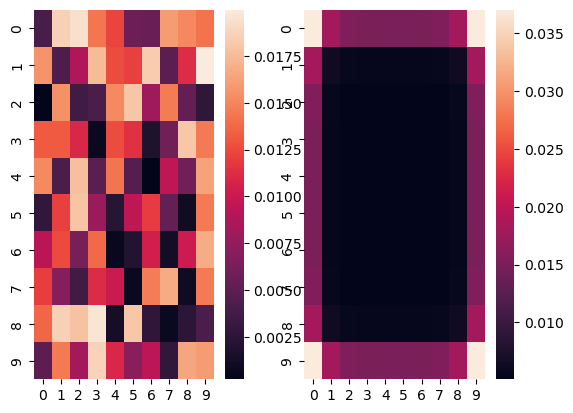

In [213]:
BETA = 1
diff = 1e-8

mu = np.random.rand(10,10)
mu /= np.sum(mu)

plt.subplot((121))
sns.heatmap(mu)

def has_converged(mu_copy, mu):
    # print(mu_copy == mu)
    avg_diff = abs(np.sum(mu_copy - mu)) / 100
    # print("avg_diff:", avg_diff)
    return avg_diff < diff

while True:
    mu_copy = mu.copy()
    for i in range(10):
        for j in range(10):
            s = 0
            s = s if j == 0 else s + (2 * mu_copy[i][j-1] - 1)
            s = s if j == 9 else s + (2 * mu_copy[i][j+1] - 1)
            s = s if i == 0 else s + (2 * mu_copy[i-1][j] - 1)
            s = s if i == 9 else s + (2 * mu_copy[i+1][j] - 1)

            s *= BETA
            s *= -1

            # print(f"i:{i}, j:{j}, s: {s}")
            
            mu[i][j] = 1 / (1 + exp(s))

    if has_converged(mu_copy, mu):
        break

mu /= np.sum(mu)
print(pd.DataFrame(mu))
plt.subplot((122))
sns.heatmap(mu)

prob_table = np.zeros((2,2))
prob_table[0][0] = mu[0][9] * mu[9][9]
prob_table[0][1] = mu[0][9] * (1 - mu[9][9])
prob_table[1][0] = (1 - mu[0][9]) * mu[9][9]
prob_table[1][1] = (1 - mu[0][9]) * (1 - mu[9][9])
prob_table /= np.sum(prob_table)

print("probability table:")
print(pd.DataFrame(prob_table))

<Axes: >

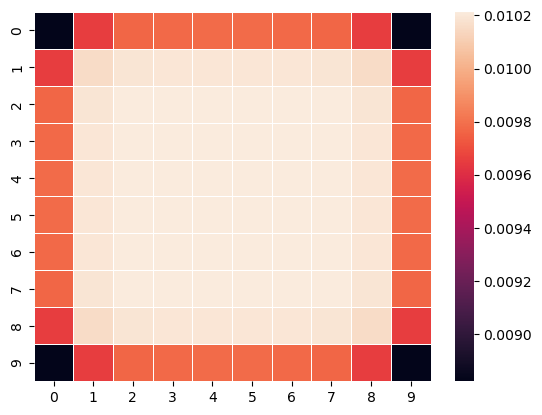

In [112]:
import seaborn as sns

sns.heatmap(mu, linewidths=0.5)

In [61]:
prob_table = np.zeros((2,2))
prob_table[0][0] = mu[0][9] * mu[9][9]
prob_table[0][1] = mu[0][9] * (1 - mu[9][9])
prob_table[1][0] = (1 - mu[0][9]) * mu[9][9]
prob_table[1][1] = (1 - mu[0][9]) * (1 - mu[9][9])
prob_table /= np.sum(prob_table)
print(prob_table)

[[0.25 0.25]
 [0.25 0.25]]


In [22]:
from math import exp
import numpy as np
import pandas as pd
import seaborn as sns

class VariationalInference:
    def __init__(self, beta : float):
        self.beta = beta
        self.mu = np.random.rand(10,10)
        self.mu /= np.sum(self.mu)


    def coord_ascent(self, num_iter : int):
        for _ in range(num_iter):
            mu = self.mu.copy()
            for i in range(10):
                for j in range(10):
                    s = 0
                    s = s if j == 0 else s + (2 * mu[i][j-1] - 1)
                    s = s if j == 9 else s + (2 * mu[i][j+1] - 1)
                    s = s if i == 0 else s + (2 * mu[i-1][j] - 1)
                    s = s if i == 9 else s + (2 * mu[i+1][j] - 1)
                    # print(f"i:{i}, j:{j}, s: {s}")
        
                    s *= self.beta
                    s *= -1
        
                    self.mu[i][j] = 1 / (1 + exp(s))

    def compute_joint(self):
        prob_table = np.zeros((2,2))
        prob_table[0][0] = (1 - self.mu[0][9]) * (1 - self.mu[9][9])
        prob_table[0][1] = (1 - self.mu[0][9]) * self.mu[9][9]
        prob_table[1][0] = self.mu[0][9] * (1 - self.mu[9][9])
        prob_table[1][1] = self.mu[0][9] * self.mu[9][9]
        prob_table /= np.sum(prob_table)
        
        self.prob_table = prob_table
        print("probability table:")
        print(pd.DataFrame(prob_table))

    def plot_mu(self):
        sns.heatmap(self.mu, linewidths=0.5)

    def run(self):
        self.coord_ascent(1000)
        self.compute_joint()
        self.plot_mu()

In [24]:
cavi_4 = VariationalInference(4)
cavi_1 = VariationalInference(1)
cavi_001 = VariationalInference(0.01)

probability table:
          0             1
0  0.999329  3.352707e-04
1  0.000335  1.124819e-07


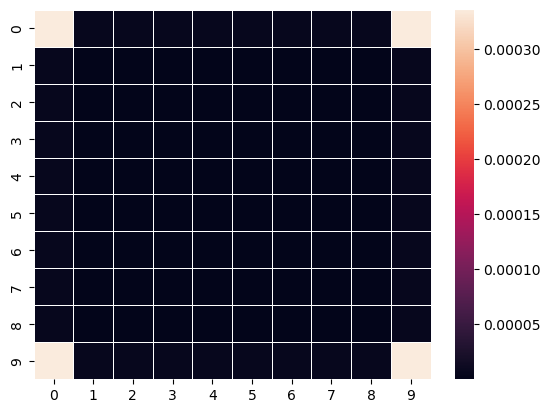

In [26]:
cavi_4.run()

          0             1             2             3             4  \
0  0.000335  6.160990e-06  6.144785e-06  6.144784e-06  6.144784e-06   
1  0.000006  1.125465e-07  1.125410e-07  1.125410e-07  1.125410e-07   
2  0.000006  1.125410e-07  1.125356e-07  1.125356e-07  1.125356e-07   
3  0.000006  1.125410e-07  1.125356e-07  1.125356e-07  1.125356e-07   
4  0.000006  1.125410e-07  1.125356e-07  1.125356e-07  1.125356e-07   
5  0.000006  1.125410e-07  1.125356e-07  1.125356e-07  1.125356e-07   
6  0.000006  1.125410e-07  1.125356e-07  1.125356e-07  1.125356e-07   
7  0.000006  1.125410e-07  1.125356e-07  1.125356e-07  1.125356e-07   
8  0.000006  1.125465e-07  1.125410e-07  1.125410e-07  1.125410e-07   
9  0.000335  6.160990e-06  6.144785e-06  6.144784e-06  6.144784e-06   

              5             6             7             8         9  
0  6.144784e-06  6.144784e-06  6.144785e-06  6.160990e-06  0.000335  
1  1.125410e-07  1.125410e-07  1.125410e-07  1.125465e-07  0.000006  
2  1.125

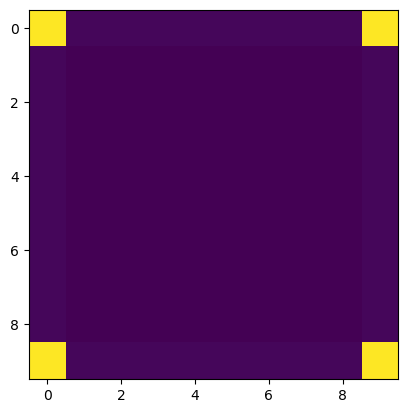

In [42]:
from matplotlib import pyplot as plt
plt.imshow(cavi_4.mu)
print(pd.DataFrame(cavi_4.mu))
print(np.sum(cavi_4.mu))

probability table:
      0     1
0  0.25  0.25
1  0.25  0.25


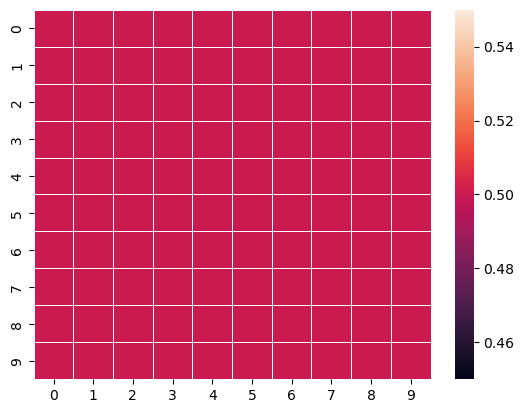

In [7]:
cavi_001.run()

probability table:
          0         1
0  0.023895  0.130684
1  0.130684  0.714738


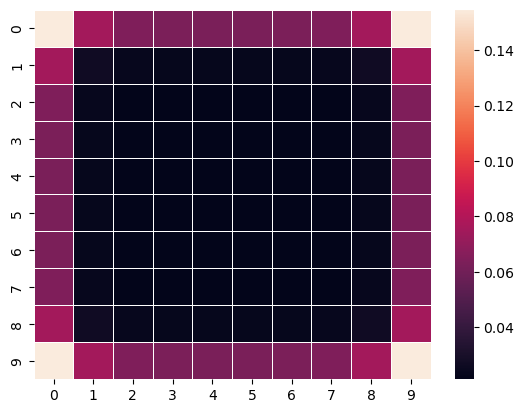

In [25]:
cavi_1.run()

In [27]:
from math import exp
import numpy as np
import pandas as pd
import seaborn as sns

class VariationalInference:
    def __init__(self, beta : float):
        self.beta = beta
        self.mu = np.random.rand(10,10)
        self.mu /= np.sum(self.mu)
        self.epsilon = 1e-8

    def coord_ascent(self):
        while True:
            mu_copy = self.mu.copy()
            for i in range(10):
                for j in range(10):
                    s = 0
                    s = s if j == 0 else s + (2 * mu_copy[i][j-1] - 1)
                    s = s if j == 9 else s + (2 * mu_copy[i][j+1] - 1)
                    s = s if i == 0 else s + (2 * mu_copy[i-1][j] - 1)
                    s = s if i == 9 else s + (2 * mu_copy[i+1][j] - 1)
                    # print(f"i:{i}, j:{j}, s: {s}")
        
                    s *= self.beta
                    s *= -1
        
                    self.mu[i][j] = 1 / (1 + exp(s))
            # self.mu /= np.sum(self.mu)
            if self.has_converged(mu_copy, self.mu):
                break
            

    def compute_joint(self):
        prob_table = np.zeros((2,2))
        prob_table[0][0] = (1 - self.mu[0][9]) * (1 - self.mu[9][9])
        prob_table[0][1] = (1 - self.mu[0][9]) * self.mu[9][9]
        prob_table[1][0] = self.mu[0][9] * (1 - self.mu[9][9])
        prob_table[1][1] = self.mu[0][9] * self.mu[9][9]
        prob_table /= np.sum(prob_table)
        
        self.prob_table = prob_table
        print("probability table:")
        print(pd.DataFrame(prob_table))

    def plot_mu(self):
        sns.heatmap(np.round(self.mu, 5), linewidths=0.5)

    def has_converged(self, mu_copy, mu):
        avg_diff = np.sum(abs(mu_copy - mu)) / 100
        return avg_diff < self.epsilon

    def run(self):
        self.coord_ascent()
        self.compute_joint()
        self.plot_mu()

In [29]:
cavi_4 = VariationalInference(4)
cavi_1 = VariationalInference(1)
cavi_001 = VariationalInference(0.01)

probability table:
          0             1
0  0.999329  3.352707e-04
1  0.000335  1.124819e-07


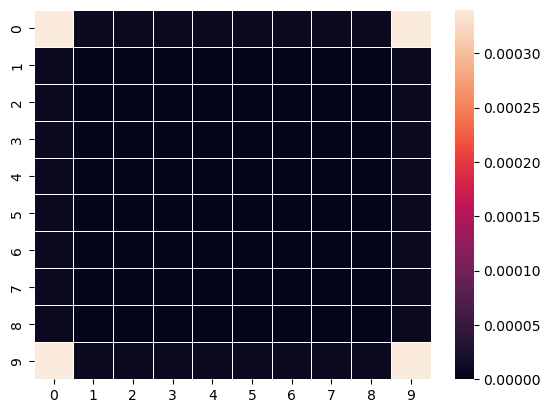

In [31]:
cavi_4.run()

probability table:
          0         1
0  0.714738  0.130684
1  0.130684  0.023895


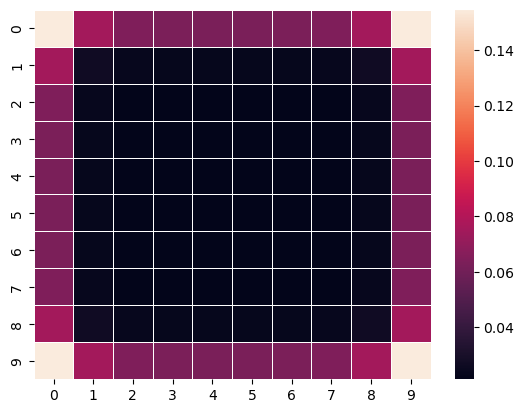

In [33]:
cavi_1.run()

probability table:
      0     1
0  0.25  0.25
1  0.25  0.25


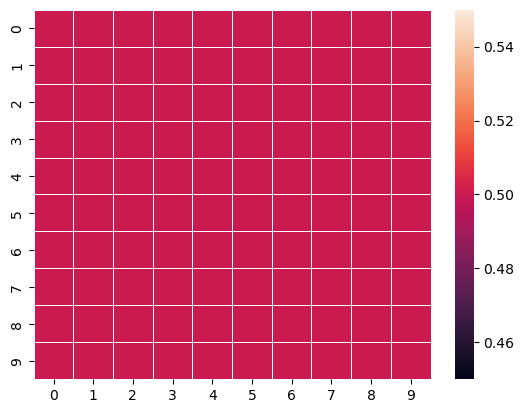

In [35]:
cavi_001.run()

In [15]:
cavi_001.mu[0][0], cavi_001.mu[4][4]

(0.4999999999946504, 0.4999999999688701)

In [40]:
value = 1.124819e-07
formatted_value = f"{value:.6f}"
print(formatted_value)

0.000000
